# Threshold Optimization

In [18]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
                                classification_report,
                                confusion_matrix,
                                roc_auc_score,
                                roc_curve,
                                precision_recall_curve,
                                f1_score,
                                precision_score,
                                recall_score,
                                accuracy_score
                            )
warnings.filterwarnings('ignore')

### 1. Loading Data

In [19]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

### 2. Model Training

In [20]:
model_lr = LogisticRegression(
                                random_state=42, # Used in Shuffling data set and more etc..
                                max_iter=1000
                            )

model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

### 3. Inference 

In [21]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)
Y_proba_train = model_lr.predict_proba(X_train)
Y_proba_test = model_lr.predict_proba(X_test)

### 4. Optimizing Treshholds

Y_hat = Y_hat_prob > 0.5

In [22]:
pd.Series(Y_test).value_counts()

0    1607
1     393
Name: count, dtype: int64

More Biased towards 0

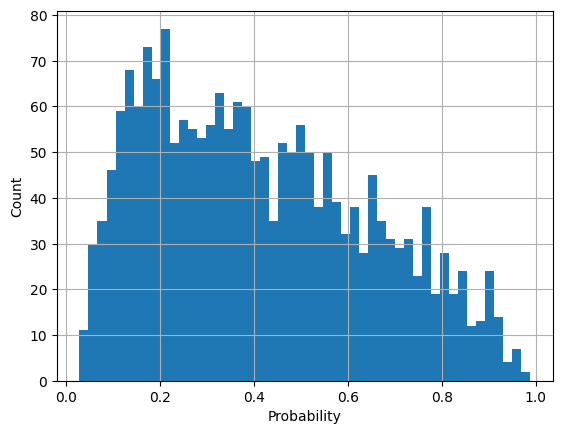

In [23]:
Y_lr_test = Y_proba_test[:, 1]
plt.hist(Y_lr_test, bins=50)
plt.xlabel('Probability')
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [24]:
# Changing Threshholds
Y_hat_test = Y_lr_test > 0.3

Can handle these using ROC AUC 

### 4. Evaluation

In [25]:
accuaracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score_val = f1_score(Y_test, Y_hat_test)
print(f"Accuarcy: {accuaracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"f1 Score: {f1_score_val}")

Accuarcy: 0.515
Precision: 0.26938449240607515
Recall: 0.8575063613231552
f1 Score: 0.4099756690997567


### 5. Confusion Matrix

Text(50.722222222222214, 0.5, 'Actual')

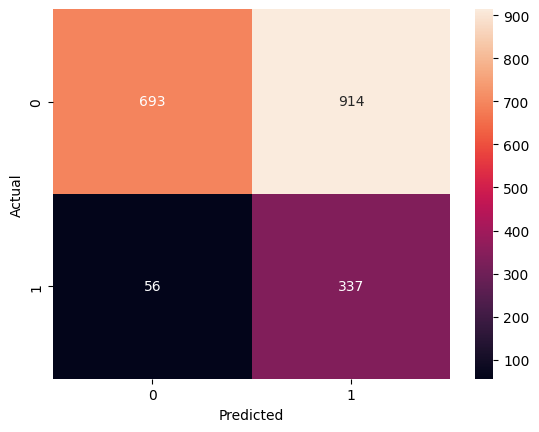

In [26]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")